In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.9 MB/s e

In [ ]:
from pycaret.datasets import get_data
data=get_data("employee")
print(type(data))
by_left=data.sort_values("Work_accident", ascending=False)
by_left.head(100)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


<class 'pandas.core.frame.DataFrame'>


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
8078,0.77,0.91,5,268,3,1,0,IT,medium,0
3570,0.50,0.60,3,270,3,1,0,management,medium,0
1784,0.43,0.51,2,149,3,1,0,accounting,medium,1
6589,0.64,0.64,3,234,3,1,0,sales,high,0
11800,0.67,0.91,2,245,2,1,1,sales,medium,0
...,...,...,...,...,...,...,...,...,...,...
5205,0.83,0.78,3,165,3,1,0,sales,medium,0
9257,0.95,0.94,2,269,4,1,0,sales,low,0
3623,0.52,0.92,3,150,2,1,0,technical,medium,0
13403,0.91,0.60,4,235,4,1,0,marketing,low,0


In [ ]:
from pycaret.classification import *
s = setup(data, target = 'left', session_id = 123,fold=5)
best = compare_models(sort="MCC")

,Description,Value
0,Session id,123
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9882,0.9913,0.9588,0.9913,0.9748,0.9671,0.9673,1.8780
lightgbm,Light Gradient Boosting Machine,0.9858,0.9932,0.9528,0.9872,0.9697,0.9604,0.9607,0.7120
xgboost,Extreme Gradient Boosting,0.9849,0.9918,0.9560,0.9800,0.9678,0.9579,0.9581,0.2480
et,Extra Trees Classifier,0.9843,0.9899,0.9516,0.9820,0.9665,0.9562,0.9565,0.9660
gbc,Gradient Boosting Classifier,0.9758,0.9890,0.9324,0.9649,0.9483,0.9326,0.9328,1.1600
dt,Decision Tree Classifier,0.9744,0.9693,0.9596,0.9346,0.9469,0.9300,0.9302,0.2760
ada,Ada Boost Classifier,0.9590,0.9834,0.9120,0.9157,0.9138,0.8869,0.8870,0.6260
knn,K Neighbors Classifier,0.9364,0.9687,0.9180,0.8324,0.8730,0.8307,0.8325,0.6960
qda,Quadratic Discriminant Analysis,0.8640,0.9029,0.7992,0.6865,0.7364,0.6458,0.6510,0.2060
nb,Naive Bayes,0.6885,0.8083,0.8008,0.4196,0.5506,0.3462,0.3887,0.2420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Codificar caracteristicas categoricas
columns_to_label_encode = ['salary', 'department']
label_encoders = {}
for column in columns_to_label_encode:
    label_encoder = LabelEncoder()
    data[f'encoded_{column}'] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder
label=data['left']
columns = ['salary', 'department']
X = data.drop(columns, axis=1)
print(data)
print(label)
print(X)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4          

In [ ]:
#Normalización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)
X_scaled = pd.DataFrame(scaled_data)
print(X_scaled)

[[-0.93649469 -1.08727529 -1.46286291 ...  1.788917   -0.55495458
   0.39372503]
 [ 0.75281433  0.84070693  0.97111292 ...  1.788917    1.04300352
   0.39372503]
 [-2.02247906  0.95755433  2.59376348 ...  1.788917    1.04300352
   0.39372503]
 ...
 [-0.97671633 -1.08727529 -1.46286291 ...  1.788917   -0.55495458
   0.74231612]
 [-2.02247906  1.42494396  1.7824382  ...  1.788917   -0.55495458
   0.74231612]
 [-0.97671633 -1.14569899 -1.46286291 ...  1.788917   -0.55495458
   0.74231612]]
              0         1         2         3         4         5         6  \
0     -0.936495 -1.087275 -1.462863 -0.882040 -0.341235 -0.411165 -0.147412   
1      0.752814  0.840707  0.971113  1.220423  1.713436 -0.411165 -0.147412   
2     -2.022479  0.957554  2.593763  1.420657  0.343655 -0.411165 -0.147412   
3      0.431041  0.899131  0.971113  0.439508  1.028546 -0.411165 -0.147412   
4     -0.976716 -1.145699 -1.462863 -0.841993 -0.341235 -0.411165 -0.147412   
...         ...       ...       ..

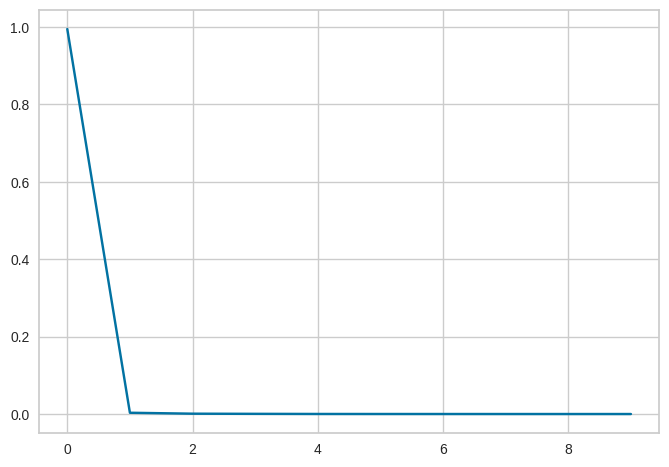

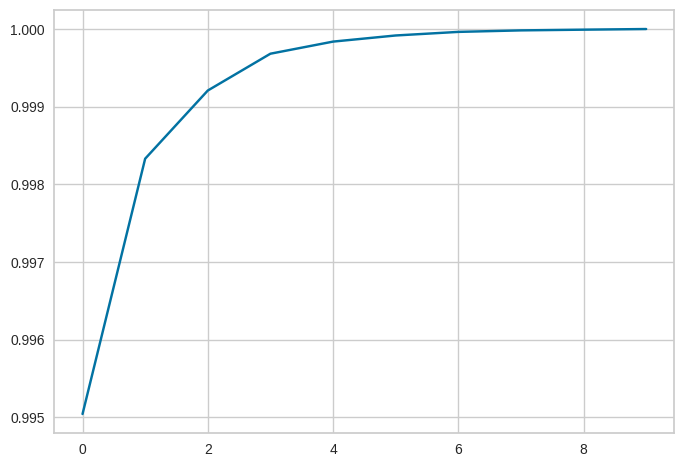

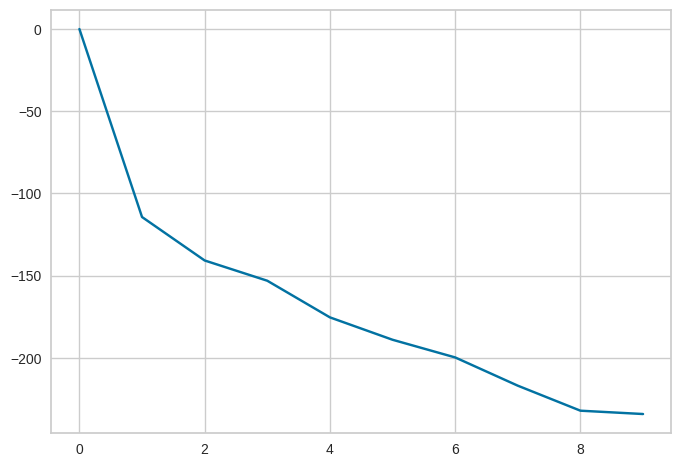

                 Feature  Explained Variance Ratio
0     satisfaction_level                  0.995043
1        last_evaluation                  0.003287
2         number_project                  0.000878
3   average_montly_hours                  0.000474
4     time_spend_company                  0.000156
5          Work_accident                  0.000079
6  promotion_last_5years                  0.000046
7                   left                  0.000020
8         encoded_salary                  0.000009
9     encoded_department                  0.000008


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, matthews_corrcoef, roc_auc_score, f1_score
import numpy as np
import pandas as pd

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_scaled, label, test_size=0.2, random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=17)
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
plt.figure()
plt.plot(20*np.log((pca.explained_variance_ratio_)))
plt.show()
explained_variance = pca.explained_variance_ratio_
feature_names = list(X.columns)
variance_df = pd.DataFrame({
    'Feature': feature_names,
    'Explained Variance Ratio': explained_variance
})

# Print or display the DataFrame
print(variance_df)

In [ ]:
componentes=1
print("con ", componentes, "componentes tenemos el ",np.cumsum(pca.explained_variance_ratio_)[componentes]*100,"De la varianza explicada")

con  1 componentes tenemos el  99.83304747174711 De la varianza explicada


In [ ]:
pca2 = PCA(n_components=componentes)
pca2.fit(X_train)
x_tr=pca2.transform(X_train)
x_te=pca2.transform(X_test)
pca2.fit(X_train_norm)
x_tr_norm=pca2.transform(X_train_norm)
x_te_norm=pca2.transform(X_test_norm)
print(X_train.shape)
print(x_tr.shape)
print(X_train_norm.shape)
print(x_tr_norm.shape)
print(X_test.shape)
print(x_te.shape)
print(X_test_norm.shape)
print(x_te_norm.shape)

(11999, 10)
(11999, 1)
(11999, 10)
(11999, 1)
(3000, 10)
(3000, 1)
(3000, 10)
(3000, 1)


#TUNNING

In [ ]:
model_rfc = RandomForestClassifier()
param_grid = {
    'criterion': ["gini", "entropy"],
    'class_weight': ["balanced", "balanced_subsample", None],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
mcc=make_scorer(matthews_corrcoef)
f1_scorer=make_scorer(f1_score)
roc=make_scorer(roc_auc_score)

grid_search = GridSearchCV(
    model_rfc, param_grid, cv=5, scoring=mcc)
grid_search.fit(x_tr, y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
tune_model_linear = grid_search.best_estimator_

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.589900      0.114962         0.021647        0.003358   
1         1.085815      0.006524         0.038097        0.001561   
2         0.637926      0.122032         0.025290        0.005886   
3         1.527698      0.248068         0.051217        0.011569   
4         0.551408      0.006829         0.019591        0.000314   
..             ...           ...              ...             ...   
319       1.749670      0.098613         0.042541        0.001850   
320       1.173830      0.255929         0.030780        0.003934   
321       1.916425      0.425707         0.049517        0.011001   
322       0.985814      0.204650         0.026341        0.004724   
323       2.100595      0.504351         0.047469        0.011279   

    param_class_weight param_criterion param_max_depth param_min_samples_leaf  \
0             balanced            gini               3                      1   
1        

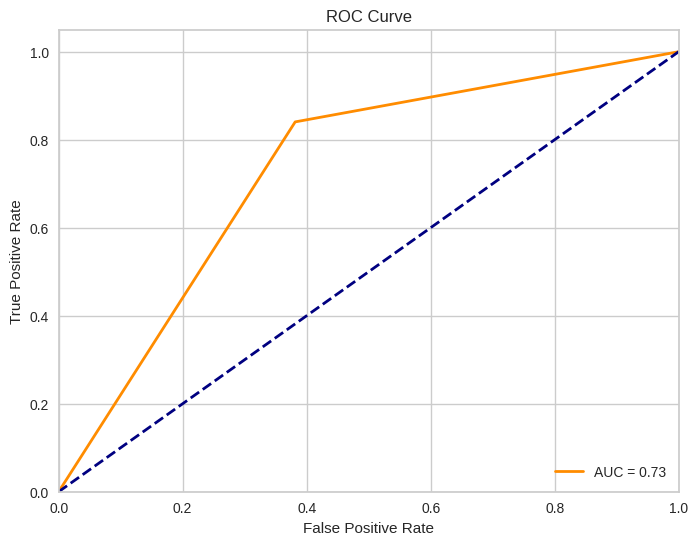

mcc sin normalizar: 0.3876134637326483
f1-score sin normalizar: 0.5416666666666667
accuracy-score sin normalizar: 0.67


In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score
model_rfc = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth= 5, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)
model_rfc.fit(x_tr,y_train)
pred=model_rfc.predict(x_te)
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
mcc = matthews_corrcoef(y_test, pred)
print("mcc sin normalizar:", mcc)
f1 = f1_score(y_test, pred)
print("f1-score sin normalizar:", f1)
acc= accuracy_score(y_test,pred)
print("accuracy-score sin normalizar:", acc)

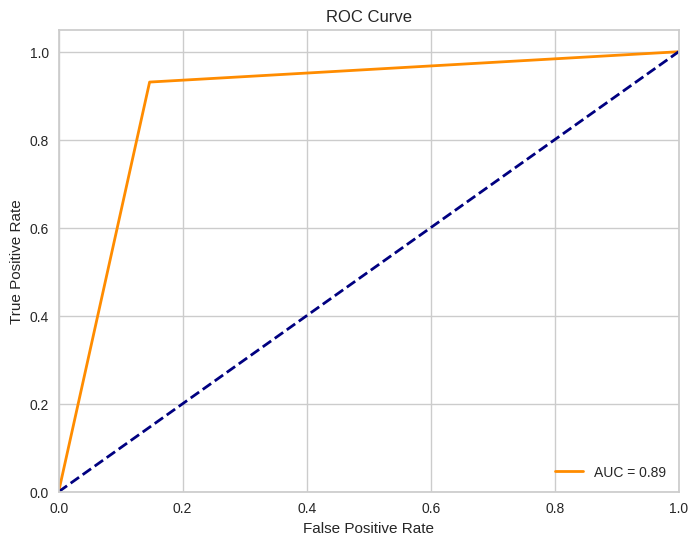

mcc normalizado: 0.7048199794343583
f1-score normalizado: 0.7705112960760999
accuracy-score sin normalizar: 0.8713333333333333


In [ ]:
model_rfc_1 = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth= 5, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)
model_rfc_1.fit(x_tr_norm,y_train_norm)
pred=model_rfc_1.predict(x_te_norm)
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_norm, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
mcc = matthews_corrcoef(y_test_norm, pred)
print("mcc normalizado:", mcc)
f1 = f1_score(y_test_norm, pred)
print("f1-score normalizado:", f1)
acc= accuracy_score(y_test_norm,pred)
print("accuracy-score sin normalizar:", acc)

#Pruebas con mayor varianza explicada

In [ ]:
componentes=5
print("con ", componentes, "componentes tenemos el ",np.cumsum(pca.explained_variance_ratio_)[componentes]*100,"De la varianza explicada")

con  5 componentes tenemos el  99.99169552296438 De la varianza explicada


In [ ]:
pca2 = PCA(n_components=componentes)
pca2.fit(X_train)
x_tr=pca2.transform(X_train)
x_te=pca2.transform(X_test)
pca2.fit(X_train_norm)
x_tr_norm=pca2.transform(X_train_norm)
x_te_norm=pca2.transform(X_test_norm)
print(X_train_norm.shape)
print(x_tr_norm.shape)
print(X_test_norm.shape)
print(x_te_norm.shape)

(11999, 10)
(11999, 5)
(3000, 10)
(3000, 5)


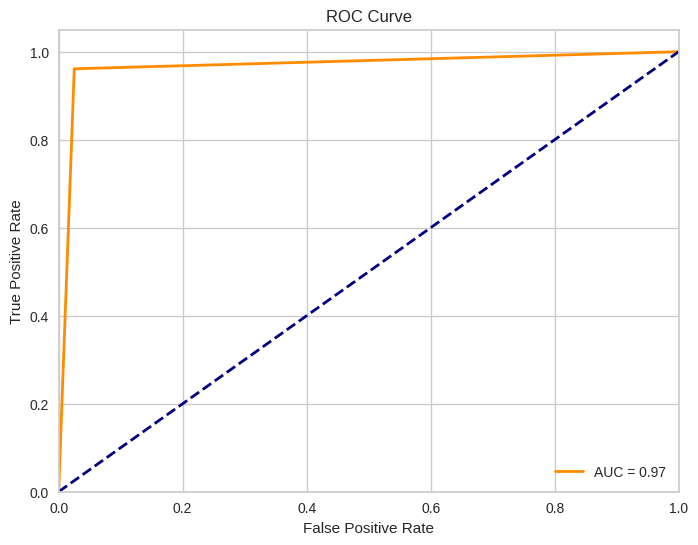

mcc normalizado: 0.9220834485000714
f1-score normalizado: 0.9402670414617006
accuracy-score sin normalizar: 0.9716666666666667


In [ ]:
model_rfc_5 = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth= 5, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)
model_rfc_5.fit(x_tr_norm,y_train_norm)
pred=model_rfc_5.predict(x_te_norm)
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_norm, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
mcc = matthews_corrcoef(y_test_norm, pred)
print("mcc normalizado:", mcc)
f1 = f1_score(y_test_norm, pred)
print("f1-score normalizado:", f1)
acc= accuracy_score(y_test_norm,pred)
print("accuracy-score sin normalizar:", acc)

In [ ]:
save_model(model_rfc_1, 'final_model')
loaded_model = load_model('final_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
